In [27]:
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
import kray
# OS interaction
import sys, pickle, os
# import subplots function for plotting
import seaborn as sns
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import kgraph
import matplotlib.gridspec as gridspec
from moviepy.editor import *

# --------------------------------------------------------------------------------------------
# Directory Lists
# Unix
if 'linux' in sys.platform:
    dirPre = '/home/lapok/gdrive/'
# Mac
elif 'darwin' in sys.platform:
    dirPre = '/Users/karllapo/gdrive/'
# Directory for printing figures
dirPrint = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/Graphics/IR_SnoqualmieFlights'
# Met data directory
dirData = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ/IR_SnoqualmieFlights'
dirDataGrobs = dirPre + 'SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ/'

# --------------------------------------------------------------------------------------------
# Global formatting
context = 'paper'
sns.set_context(context)
sns.set_style('whitegrid')
# must insert this statement to render the plots within the notebook
%matplotlib inline

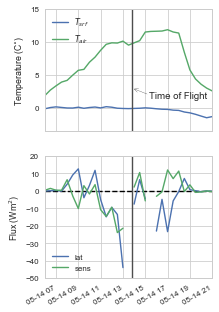

In [37]:
# Met observations
os.chdir(dirDataGrobs)
sns.set_context('paper')
support = xr.open_dataset('SnoqualmieObs.SupportData.wy2013_wy2015.nc')

grobsDay = support.sel(time=slice('2013-05-14 06:00', '2013-05-14 21:00'))
d1 = datetime(2013, 5, 14, 6, 0)
d2 = datetime(2013, 5, 14, 21, 0)
d = datetime(2013, 5, 14, 13, 50)

fig, axes = plt.subplots(2, 1, figsize=(3, 5.5), sharex=True)

ax = axes[0]
ax.plot(grobsDay.time, grobsDay.Tsrf, label='$T_{srf}$')
ax.plot(grobsDay.time, grobsDay.T6, label='$T_{air}$')
ax.plot([d, d], [-3.5, 15], color='0.3')
ax.set_ylim(-3.5, 15)
ax.set_xlim([d1, d2])
ax.set_ylabel('Temperature (C$^{\circ}$)')
ax.text(d + timedelta(hours=1.5), 1.5, 'Time of Flight')
ax.annotate("", xy=(d, 3), xytext=(d + timedelta(hours=1.5), 2),
            arrowprops=dict(arrowstyle="->"))
ax.legend(loc='upper left')

ax = axes[1]
ax.plot([grobsDay.time.values[0], grobsDay.time.values[-1]], [0, 0], 'k--')
ax.plot(grobsDay.time, grobsDay.LatFlux, label='lat')
ax.plot(grobsDay.time, grobsDay.SensFlux, label='sens')
ax.plot([d, d], [-50, 20], color='0.3')
ax.set_xlim([d1, d2])
ax.set_ylim(-50, 20)
ax.set_ylabel('Flux (Wm$^{2}$)')
ax.legend(loc='best')

fig.autofmt_xdate()
os.chdir('/Users/karllapo/gdrive/SnowHydrology/proj/TurbulenceFeedbacks/Graphics')
fig.savefig('SNQ.FlightMetObs.pdf', bbox_inches='tight')

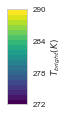

In [33]:
## General colorbar arguments
cmin = 272
cmax = 290
ncol = 19
dcol = (cmax - cmin) / (ncol - 1)
# cmap = sns.cubehelix_palette(11, start=2.6, rot=.075, light=0.8, as_cmap=True)
cmap = kgraph.cmap_discretize(cm.viridis, ncol)

# Colorbar for Snoqualmie
bounds = [272, 278, 284, 290]
fig, caxi = plt.subplots(1, 1, figsize=(.35, 1.75))
# Set the colormap and norm to correspond to the data for which
# the colorbar will be used.
norm = matplotlib.colors.Normalize(vmin=272, vmax=290)
cbar = matplotlib.colorbar.ColorbarBase(caxi, cmap=cmap, norm=norm, orientation='vertical', ticks=bounds)

# cbar = plt.colorbar(im, cax=caxi, orientation="vertical", spacing='proportional')
cbar.ax.set_ylabel('$T_{bright} (K)$')
fig.savefig('SNQ.Flight.Colorbar.' + context + '.pdf', bbox_inches='tight')

In [25]:
290 - 272

18

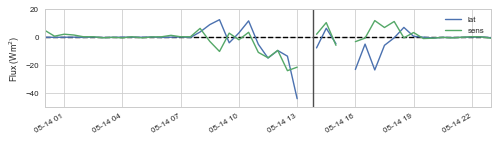

In [15]:
# Met observations
os.chdir(dirDataGrobs)
sns.set_context('paper')
support = xr.open_dataset('SnoqualmieObs.SupportData.wy2013_wy2015.nc')

grobsDay = support.sel(time=slice('2013-05-14', '2013-05-14 23:00'))
d = datetime(2013, 5, 14, 13, 50)

fig, axes = plt.subplots(1, 1, figsize=(8, 2), sharex=True)

ax = axes
ax.plot([grobsDay.time.values[0], grobsDay.time.values[-1]], [0, 0], 'k--')
ax.plot(grobsDay.time, grobsDay.LatFlux, label='lat')
ax.plot(grobsDay.time, grobsDay.SensFlux, label='sens')
ax.plot([d, d], [-50, 20], color='0.3')
ax.set_ylim(-50, 20)
ax.set_xlim(datetime(2013, 5, 14, 0, 0), datetime(2013, 5, 14, 23, 0))
ax.set_ylabel('Flux (Wm$^{2}$)')
ax.legend(loc='best')

fig.autofmt_xdate()
os.chdir('/Users/karllapo/gdrive/SnowHydrology/proj/TurbulenceFeedbacks/Graphics')
fig.savefig('SNQ.FlightMetObs.pdf', bbox_inches='tight')

In [ ]:
# Met observations
os.chdir(dirDataGrobs)
support = xr.open_dataset('SnoqualmieObs.SupportData.wy2013_wy2015.nc')

grobsDay = support.sel(time=slice('2013-05-14', '2013-05-14 23:00'))

fig, axes = plt.subplots(4, 1, figsize=(6, 15), sharex=True)

ax = axes[0]
ax.plot(grobsDay.time, grobsDay.Tsrf, label='$T_{srf}$')
ax.plot(grobsDay.time, grobsDay.T6, label='$T_{air}$')
ax.plot([d.values, d.values], [-3.5, 15], color='0.3')
ax.set_ylim(-3.5, 15)
ax.set_ylabel('Temperature (C$^{\circ}$)')
ax.legend(loc='best')

ax = axes[1]
ax.plot(grobsDay.time, grobsDay.WIND, label='wind')
ax.plot([d.values, d.values], [0, 3], color='0.3')
ax.set_ylim(0, 3)
ax.set_ylabel('Wind (m s$^{-1}$)')
ax.legend(loc='best')

ax = axes[2]
ax.plot(grobsDay.time, grobsDay.SW_down_avg - grobsDay.SW_up_avg, label='net SW')
ax.plot(grobsDay.time, grobsDay.LW_down_avg - grobsDay.LW_up_avg, label='net LW')
ax.plot(grobsDay.time, -grobsDay.Lysimeter * 334000, label='melt')
ax.plot([d.values, d.values], [-600, 600], color='0.3')
ax.set_ylim(-600, 600)
ax.set_ylabel('Flux (Wm$^{2}$)')
ax.legend(loc='best')

ax = axes[3]
ax.plot(grobsDay.time, grobsDay.LatFlux, label='lat')
ax.plot(grobsDay.time, grobsDay.SensFlux, label='sens')
ax.plot([d.values, d.values], [-50, 20], color='0.3')
ax.set_ylim(-50, 20)
ax.set_ylabel('Flux (Wm$^{2}$)')
ax.legend(loc='best')

fig.autofmt_xdate()

In [4]:
# --------------------------------------------------------------------------------------------
# Functions/classes for reading binary files in python
# From: http://code.activestate.com/recipes/577610-decoding-binary-files/
import struct

class BinaryReaderEOFException(Exception):
    def __init__(self):
        pass
    def __str__(self):
        return 'Not enough bytes in file to satisfy read request'

class BinaryReader:
    # Map well-known type names into struct format characters.
    typeNames = {
        'int8'   :'b',
        'uint8'  :'B',
        'int16'  :'h',
        'uint16' :'H',
        'int32'  :'i',
        'uint32' :'I',
        'int64'  :'q',
        'uint64' :'Q',
        'float'  :'f',
        'double' :'d',
        'char'   :'s'}

    def __init__(self, fileName):
        self.file = open(fileName, 'rb')
        
    def seek(self, seekLocation):
        self.file.seek(seekLocation)

    def read(self, typeName):
        typeFormat = BinaryReader.typeNames[typeName.lower()]
        typeSize = struct.calcsize(typeFormat)
        value = self.file.read(typeSize)
        if typeSize != len(value):
            raise BinaryReaderEOFException
        return struct.unpack(typeFormat, value)[0]

    def __del__(self):
        self.file.close()

In [5]:
def readInfraredCamera(fname,
                       findex=[0.],
                       params=([1904, 1904, 16, 640, 480]),
                      infoOnlyFlag=True):
    '''
    fname   - string, filename of the IR camera files. Requires a corresponding GPS/IMU and timefile
    findex  - numpy array of integers, image numbers to read
    params  - numpy array of integers, describes image
    '''
    # params - [bit_header_offset bit_spacer bit_depth width height]
    # findex - specific frames to read in
    
    # --------------------------------------------------------------------------------------------
    # get params for reading in and making data output
    info = {}
    info['hbit'] = params[0]
    info['obit'] = params[1]
    info['bit'] = params[2]
    info['bitdepth'] = info['bit']
    info['width'] = params[3]
    info['height'] = params[4]
    
    # --------------------------------------------------------------------------------------------
    # Image information
    fInfo = os.stat(fname)

    # calculated frame number
    nFrames = round((fInfo.st_size - (info['hbit'] -info['obit'])/8)
                    /((info['width'] * info['height'] * info['bitdepth'] + info['obit']) / 8)) 
    info['nframes'] = nFrames

    # --------------------------------------------------------------------------------------------
    # read time and temp from timesFile
    # Time files have the same file name as the corresponding '*.dat' files
    timeFilename = fname.split('.')[0]
    timeFilename = timeFilename + '.txt'

    # Check to see that the time file exists (nothing here yet)
    # I think the best solution here is to throw an error if no file is found.
    # The pandas 'read_csv' (below) should already give us this desired behavior

    # Read the file with time stamps and camera temperatures for each image
    timeFile = pd.read_csv(timeFilename,
                           header=None,
                           names=['epochTime',
                                  'tempName1', 'camTemp',
                                  'tempName2', 'refTemp'], 
                           index_col='epochTime')
    timeFile.drop('tempName2', axis=1, inplace=True)
    timeFile.drop('tempName1', axis=1, inplace=True)
    
    # Assumes we are reading a csv with this form:
    # 5 columnes: 1 time stamp, 4 giving camera temperatures (label1, temp1, label2, temp2)
    # "1368578461.593, 280F9A5403000002 , 8.63 , 287FE81C040000F2 , 9.19"
    # OR
    # 1 column: time stamp
    # "1368578461.593"
    #
    # Something about the temp probes was changed after April 2013 resulting in two different code
    # blocks to handle each in the original matlab code. Since all of the data I'm using is after
    # that date, I am going to ignore the code for data prior to that date

    # Each time stamp corresponds to an IR image.
    numImages = timeFile.index.size
    # Convert to numpy64 datetime objects (epochTime is in seconds since 1970)
    timeFile.index = [datetime.fromtimestamp(d) for d in timeFile.index.values]
    # exit on infoFlag
    if infoOnlyFlag:
        return(info, timeFile)
        
    # --------------------------------------------------------------------------------------------
    # Acquire IR camera images
    numFrames = fIndex.size
    info['nFrames'] = numFrames

    # There is this 'uvs' argument in the original matlab read script, but it isn't defined. This
    # variable is never used in the 'snowIR_example.m' script, so I'm going to ignore the code block
    # that handles it.
    binDataOut = np.zeros([info['height'], info['width'], info['nFrames']])
    imageSize = info['width'] * info['height']

    for j in np.arange(0, numFrames):
        # Update progress
        if numFrames > 1:
            print("\r", '%d of %d' % (j+1, numFrames), end="")

        # Discover next position in binary file
        seekBitLoc = (info['width'] * info['height'] * (info['bit'] / 8) + info['obit'] / 8) \
                     * (fIndex[j]) + info['hbit'] / 8
        seekBitLoc = int(seekBitLoc)

        # Ready binary file
        binaryReader = BinaryReader(fname)
        # Point python to the desired location in the binary file (0 means seek from beginning of file)
        binaryReader.seek(seekBitLoc)
        try:
            numBinaryItems = imageSize
            data = np.empty(numBinaryItems)
            for binIndex in np.arange(numBinaryItems):
                data[binIndex] = binaryReader.read('uint16')
            binDataOut[:, :, j] = data.reshape(info['height'], info['width'])

        except BinaryReaderEOFException:
            # One of our attempts to read a field went beyond the end of the file.
            print("Error: File seems to be corrupted.")
        
    return binDataOut, timeFile

In [6]:
import utm


def readIMU(fname):
    # Column 1 is time
    # Columns 12 and 13 are lat and lon
    # Columns 2-9 are actually column 2 in the readme and original MATLAB code - they are demarked using a semi-colon

    try:
        # Pandas based reading of the gps file
        temp = pd.read_csv(fname, skiprows=1, header=None, index_col=[0])

        # Drop rows with "#BESTPOSA"
        temp = temp[temp[1] != '#BESTPOSA']
        d = {'lat': temp[12],
             'lon': temp[13],
             'pitch': temp[19],
             'roll': temp[18],
             'azmth': temp[20],
             'elev': temp[14],
             'velocity': temp[17]}
        gpsFile = pd.DataFrame(d)
        gpsFile.index.rename('time', inplace=True)

        # Convert to numpy64 datetime objects (epochTime is in seconds since 1970)
        gpsFile.index = [datetime.fromtimestamp(d) for d in gpsFile.index.values]

        # Convert to UTM coordinates - returned from function (lat, lon, zone, _)
        [gpsFile['easting'], gpsFile['northing'], gpsFile['zone']] = zip(
            *(utm.from_latlon(lat, lon)[0:3] for (lat, lon) in zip(gpsFile.lat, gpsFile.lon)))
    except ValueError:
        # GPS file likely only contains the "#BESTPOSA" without a corresponding "#INSPVAA" row.
        # Return just the GPS locations instead of the IMU+GPS (I think).
        
        # Pandas based reading of the gps file
        temp = pd.read_csv(fname, skiprows=1, header=None, index_col=[0])
        d = {'lat': temp[12],
             'lon': temp[13],
             'pitch': temp[19],
             'roll': temp[18],
             'azmth': temp[20],
             'elev': temp[14],
             'velocity': temp[17]}
        gpsFile = pd.DataFrame(d)
        gpsFile.index.rename('time', inplace=True)

        # Convert to numpy64 datetime objects (epochTime is in seconds since 1970)
        gpsFile.index = [datetime.fromtimestamp(d) for d in gpsFile.index.values]

        # Convert to UTM coordinates - returned from function (lat, lon, zone, _)
        [gpsFile['easting'], gpsFile['northing'], gpsFile['zone']] = zip(
            *(utm.from_latlon(lat, lon)[0:3] for (lat, lon) in zip(gpsFile.lat, gpsFile.lon)))
    else:
        # Otherwise return an empy argument
        print("No location data found in: " + fname)
        return None

    return(gpsFile)

In [7]:
# File names of the IR camera data
# VISIBLE IMAGES
# *-IR_02_STACK.txt = time file (no reference temperature)
# *-IR_02_STACK.dat = binary data file (EO)
# These data are mosaiced grbg colors. Chris uses `demosaic` in his example script.
# Look for a similar function in python.
# paramsE = [0, 0, 8, 1280, 960] parameter for reading in the EO images

# IR Observations
# *-IR_1_STACK.txt = time file (w/ reference temperature)
# *-IR_0_STACK.txt = time file (w/ reference temperature)

# Location file
# *-INS.DAT = binary file with GPS/IMU data

# --------------------------------------------------------------------------------------------
# Dictionary of all flights
fl1 = {'LOCATION': '1368565948_2013MAY14_2112CUT_PLANE-INS.DAT',
       'IR1': '1368565948_2013MAY14_2112CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368565948_2013MAY14_2112CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368565948_2013MAY14_2112CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368565948_2013MAY14_2112CUT_PLANE_DRS-IR_1_STACK.txt'}

fl2 = {'LOCATION': '1368565959_2013MAY14_2112CUT_PLANE-INS.DAT',
       'IR1': '1368565959_2013MAY14_2112CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368565959_2013MAY14_2112CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368565959_2013MAY14_2112CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368565959_2013MAY14_2112CUT_PLANE_DRS-IR_1_STACK.txt',
       'VISIBLE': '1368566727_2013MAY14_2125CUT_PLANE_DRS-IR_02_STACK.dat',
       'VISIBLE_TIME': '1368566727_2013MAY14_2125CUT_PLANE_DRS-IR_02_STACK.txt'}

fl3 = {'LOCATION': '1368567317_2013MAY14_2135CUT_PLANE-INS.DAT',
       'IR1': '1368567317_2013MAY14_2135CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368567317_2013MAY14_2135CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368567317_2013MAY14_2135CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368567317_2013MAY14_2135CUT_PLANE_DRS-IR_1_STACK.txt'}

fl4 = {'LOCATION': '1368567328_2013MAY14_2135CUT_PLANE-INS.DAT',
       'IR1': '1368567328_2013MAY14_2135CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368567328_2013MAY14_2135CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368567328_2013MAY14_2135CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368567328_2013MAY14_2135CUT_PLANE_DRS-IR_1_STACK.txt'}

fl5 = {'LOCATION': '1368567353_2013MAY14_2135CUT_PLANE-INS.DAT',
       'IR1': '1368567353_2013MAY14_2135CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368567353_2013MAY14_2135CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368567353_2013MAY14_2135CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368567353_2013MAY14_2135CUT_PLANE_DRS-IR_1_STACK.txt'}
       
fl6 = {'LOCATION': '1368567391_2013MAY14_2136CUT_PLANE-INS.DAT',
       'IR1': '1368567391_2013MAY14_2136CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368567391_2013MAY14_2136CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368567391_2013MAY14_2136CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368567391_2013MAY14_2136CUT_PLANE_DRS-IR_1_STACK.txt',
       'VISIBLE': '1368567853_2013MAY14_2144CUT_PLANE_DRS-IR_02_STACK.dat',
       'VISIBLE_TIME': '1368567853_2013MAY14_2144CUT_PLANE_DRS-IR_02_STACK.txt'}

fl7 = {'LOCATION': '1368574071_2013MAY14_2327CUT_PLANE-INS.DAT',
       'IR1': '1368574071_2013MAY14_2327CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368574071_2013MAY14_2327CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368574071_2013MAY14_2327CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368574071_2013MAY14_2327CUT_PLANE_DRS-IR_1_STACK.txt'}
            
fl8 = {'LOCATION': '1368574082_2013MAY14_2328CUT_PLANE-INS.DAT',
       'IR1': '1368574082_2013MAY14_2328CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368574082_2013MAY14_2328CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368574082_2013MAY14_2328CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368574082_2013MAY14_2328CUT_PLANE_DRS-IR_1_STACK.txt'}
       
fl9 = {'LOCATION': '1368574106_2013MAY14_2328CUT_PLANE-INS.DAT',
       'IR1': '1368574106_2013MAY14_2328CUT_PLANE_DRS-IR_0_STACK.dat',
       'IR1_TIME': '1368574106_2013MAY14_2328CUT_PLANE_DRS-IR_0_STACK.txt',
       'IR2': '1368574106_2013MAY14_2328CUT_PLANE_DRS-IR_1_STACK.dat',
       'IR2_TIME': '1368574106_2013MAY14_2328CUT_PLANE_DRS-IR_1_STACK.txt',
       'VISIBLE': '1368574151_2013MAY14_2329CUT_PLANE_DRS-IR_02_STACK.dat',
       'VISIBLE_TIME': '1368574151_2013MAY14_2329CUT_PLANE_DRS-IR_02_STACK.txt'}

fl10 = {'LOCATION': '1368575242_2013MAY14_2347CUT_PLANE-INS.DAT',
        'IR1': '1368575242_2013MAY14_2347CUT_PLANE_DRS-IR_0_STACK.dat',
        'IR1_TIME': '1368575242_2013MAY14_2347CUT_PLANE_DRS-IR_0_STACK.txt',
        'IR2': '1368575242_2013MAY14_2347CUT_PLANE_DRS-IR_1_STACK.dat',
        'IR2_TIME': '1368575242_2013MAY14_2347CUT_PLANE_DRS-IR_1_STACK.txt',
        'VISIBLE': '1368575246_2013MAY14_2347CUT_PLANE_DRS-IR_02_STACK.dat',
        'VISIBLE_TIME': '1368575246_2013MAY14_2347CUT_PLANE_DRS-IR_02_STACK.txt'}

fl11 = {'LOCATION': '1368575946_2013MAY14_2359CUT_PLANE-INS.DAT',
        'IR1': '1368575946_2013MAY14_2359CUT_PLANE_DRS-IR_0_STACK.dat',
        'IR1_TIME': '1368575946_2013MAY14_2359CUT_PLANE_DRS-IR_0_STACK.txt',
        'IR2': '1368575946_2013MAY14_2359CUT_PLANE_DRS-IR_1_STACK.dat',
        'IR2_TIME': '1368575946_2013MAY14_2359CUT_PLANE_DRS-IR_1_STACK.txt',
        'VISIBLE': '1368575950_2013MAY14_2359CUT_PLANE_DRS-IR_02_STACK.dat',
        'VISIBLE_TIME': '1368575950_2013MAY14_2359CUT_PLANE_DRS-IR_02_STACK.txt'}
            
fl12 = {'LOCATION': '1368578462_2013MAY15_0041CUT_PLANE-INS.DAT',
        'IR1': '1368578462_2013MAY15_0041CUT_PLANE_DRS-IR_0_STACK.dat',
        'IR1_TIME': '1368578462_2013MAY15_0041CUT_PLANE_DRS-IR_0_STACK.txt',
        'IR2': '1368578462_2013MAY15_0041CUT_PLANE_DRS-IR_1_STACK.dat',
        'IR2_TIME': '1368578462_2013MAY15_0041CUT_PLANE_DRS-IR_1_STACK.txt',
        'VISIBLE': '1368578466_2013MAY15_0041CUT_PLANE_DRS-IR_02_STACK.dat',
        'VISIBLE_TIME': '1368578466_2013MAY15_0041CUT_PLANE_DRS-IR_02_STACK.txt'}

fl13 = {'LOCATION': '1368579145_2013MAY15_0052CUT_PLANE-INS.DAT',
        'IR1': '1368579145_2013MAY15_0052CUT_PLANE_DRS-IR_0_STACK.dat',
        'IR1_TIME': '1368579145_2013MAY15_0052CUT_PLANE_DRS-IR_0_STACK.txt',
        'IR2': '1368579145_2013MAY15_0052CUT_PLANE_DRS-IR_1_STACK.dat',
        'IR2_TIME': '1368579145_2013MAY15_0052CUT_PLANE_DRS-IR_1_STACK.txt',
        'VISIBLE': '1368579147_2013MAY15_0052CUT_PLANE_DRS-IR_02_STACK.dat',
        'VISIBLE_TIME': '1368579147_2013MAY15_0052CUT_PLANE_DRS-IR_02_STACK.txt'}

irCameraDictionary = ['LOCATION', 'IR1', 'IR2', 'VISIBLE']

# irFiles = ["fl" + str(fNum) for fNum in np.arange(1, 14)]
irFiles  = [fl1, fl2, fl3, fl4, fl5, fl6, fl7, fl8, fl9, fl10, fl11, fl12, fl13]
# irFiles = [fl10, fl11, fl12, fl13]

In [9]:
# --------------------------------------------------------------------------------------------
os.chdir(dirData)

# --------------------------------------------------------------------------------------------
# Variables to pass to the read function:
paramsIR = np.array([1904, 1904, 16, 640, 480])
paramsVis = np.array([0, 0, 8, 1280, 960])
cameraLocDataset = xr.Dataset()

for irf in irFiles:
    # --------------------------------------------------------------------------------------------
    # Determine the number of images per flight line
    infoOnlyFlag = True
    fIndex = 0
    fnameData = irf['IR1']
    info, cameraTime = readInfraredCamera(fnameData,
                                          findex=fIndex,
                                          params=paramsIR,
                                          infoOnlyFlag=infoOnlyFlag)

    fIndex = np.arange(0, int(info['nframes']), 1)
    fIndex = np.atleast_1d(fIndex)
    
    # --------------------------------------------------------------------------------------------
    # Read the binary file
    infoOnlyFlag = False
    
    # --------------------------------------------------------------------------------------------
    # Read GPS/IMU
    cameraLoc = readIMU(irf['LOCATION'])
    cameraLoc.index.rename('time', inplace=True)
    
    if not cameraLocDataset:

        # Append to xaray Dataset
        cameraLocDataset = xr.Dataset.from_dataframe(cameraLoc)
    #     cameraLocDataset = cameraLocDataset.reindex_like(cameraDataset, method='nearest')
    elif cameraLocDataset:
        print(cameraLocDataset)
        cameraLocDataset = xr.concat([cameraLocDataset, xr.Dataset.from_dataframe(cameraLoc)], dim='time')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/karllapo/gdrive/SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ/IR_SnoqualmieFlights'

In [7]:
print(irCameraDictionary)

['LOCATION', 'IR1', 'IR2', 'VISIBLE']


In [3]:
# --------------------------------------------------------------------------------------------
os.chdir(dirData)

# --------------------------------------------------------------------------------------------
# Variables to pass to the read function:
paramsIR = np.array([1904, 1904, 16, 640, 480])
paramsVis = np.array([0, 0, 8, 1280, 960])

# --------------------------------------------------------------------------------------------
# Determine the number of images per flight line
infoOnlyFlag = True
fIndex = np.arange(2000, 7000, 10)
fIndex = np.atleast_1d(fIndex)
fnameData = fl10['IR1'] #str(fl1['LOCATION'])
# info, cameraTime = readInfraredCamera(fnameData,
#                                       findex=fIndex,
#                                       params=paramsIR,
#                                       infoOnlyFlag=infoOnlyFlag)



# --------------------------------------------------------------------------------------------
# Read the binary file
infoOnlyFlag = False

cameraData, cameraTime = readInfraredCamera(fnameData, findex=fIndex, params=paramsIR, infoOnlyFlag=False)
cameraDataset = xr.Dataset({'images': (['x', 'y', 'time'],  cameraData)},
                           coords={'time': cameraTime.index[fIndex]})
# Mean counts to remove from data
imMean = cameraDataset.mean(dim='time')
# Camera reference temperature
refTemp = cameraTime.camTemp.mean()
# Convert to a brightness temperature following some unknown function
brightTemp = (cameraDataset.images - imMean.images) / 250 + refTemp

FileNotFoundError: [Errno 2] No such file or directory: '/Users/karllapo/gdrive/SnowHydrology/proj/TurbulenceFeedbacks/data/SNQ/IR_SnoqualmieFlights'

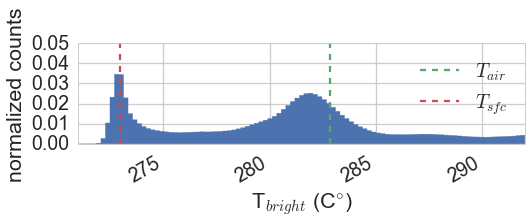

In [10]:
bright1d = (brightTemp.isel(time=(slice(350,400))).values.flatten()) - .8
# bright1d = brightTemp.values.flatten() - 1.5

# Histogram - counts and bins
fig, ax = plt.subplots(1,1,figsize=(8, 2))
cmin = 273 - 2
cmax = 273 + 19
tsp = np.linspace(cmin, cmax, 100)
weights = np.ones_like(bright1d) / float(len(bright1d))
counts, bins, m = ax.hist(bright1d + 273, bins=tsp,
                          normed=False, fill=True,
                          histtype='step', weights=weights)


# Surface and air temperature
d = cameraLocDataset.time[0]
airTemp = support.T6.sel(time=d, method='nearest').values + 273
sfcTemp = support.Tsrf.sel(time=d, method='nearest').values + 273
ax.plot([airTemp, airTemp], [0, .25], '--', label='$T_{air}$')
ax.plot([sfcTemp, sfcTemp], [0, .25], '--', label='$T_{sfc}$')

ax.set_xlim(cmin, cmax)
ax.set_ylim(0, 0.05)
ax.set_xlabel('T$_{bright}$ (C$^{\circ}$)')
ax.set_ylabel('normalized counts')
fig.autofmt_xdate()
# ax.text(sfcTemp + 0.75, 0.045, '$T_{sfc}$')
# ax.text(airTemp + 0.75, 0.045, '$T_{air}$')
ax.legend(loc='upper right')

os.chdir(dirPrint)
fig.savefig('SNQ.Tsurf_Flights.pdf')

In [81]:
print(airTemp)

282.853333333
